In [18]:
#importing library file
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import preprocessing 
#getting the data set
data= pd.read_csv('the.csv')
# Showing the first five rows of train data set 
data.head()
data.loc[data['As'] <= 10, 'new_As'] = 'Unsafe' 
data.loc[data['As'] > 10, 'new_As'] = 'Safe' 
data['new_As']=pd.get_dummies(data.new_As, drop_first=True)
# Linear Model for the  train and test
y = data['new_As']
X = data.drop(['new_As', 'As','Type_of_well'], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42,test_size=.23)

In [20]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=2)
model_H=clf.fit(X_train,y_train)
accuracy = round(model_H.score(X_test,y_test)*100,2)
print (accuracy)

91.36


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel 

In [22]:
select= SelectFromModel(RandomForestClassifier(n_estimators=10,random_state=32),threshold="median")

In [23]:
select.fit(X_train,y_train)
X_train_l1=select.transform(X_train)


In [24]:
X_test_L1=select.transform(X_test)
 

In [25]:
klf = DecisionTreeRegressor(max_depth=2)
model_k=klf.fit(X_train_l1,y_train)
accuracy = round(model_k.score(X_test_L1,y_test)*100,2)
print (accuracy)

91.36


In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_l1,y_train)
accuracy = round(lr.score(X_test_L1,y_test)*100,2)
print (accuracy)
y_pred=lr.predict(X_test_L1)

94.59


/Users/anshumalikarna/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred, target_names=["safe","unsafe"]))

              precision    recall  f1-score   support

        safe       0.91      1.00      0.95        20
      unsafe       1.00      0.88      0.94        17

    accuracy                           0.95        37
   macro avg       0.95      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



Text(0, 0.5, 'Recall')

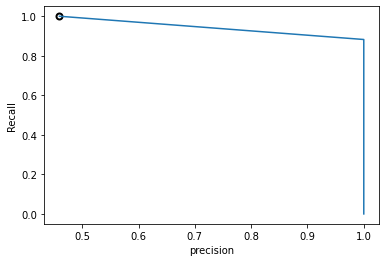

In [11]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds= precision_recall_curve(y_test,lr.predict(X_test_L1))
close_zero= np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',label="threshold zero",fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("Recall")

In [12]:
from sklearn.metrics import roc_auc_score 
lr_auc = roc_auc_score(y_test,lr.predict(X_test_L1)) 
print("Auc for logistic regression without preprocessing: {:.3f}".format(lr_auc))

Auc for logistic regression without preprocessing: 0.941


In [13]:
lr.fit(X_train,y_train)
accuracy = round(lr.score(X_test,y_test)*100,2)
print (accuracy)
pred_logreg=lr.predict(X_test)

91.89


/Users/anshumalikarna/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
print(classification_report(y_test,pred_logreg, target_names=["safe","unsafe"]))

              precision    recall  f1-score   support

        safe       0.95      0.90      0.92        20
      unsafe       0.89      0.94      0.91        17

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



In [15]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds= precision_recall_curve(y_test,lr.predict(X_test))

Text(0, 0.5, 'Recall')

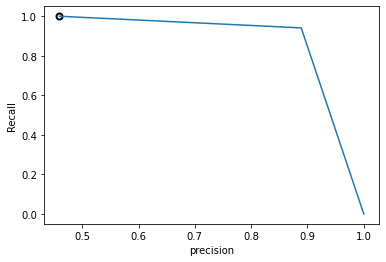

In [16]:
close_zero= np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',label="threshold zero",fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("Recall")

In [17]:
from sklearn.metrics import roc_auc_score 
lr_auc = roc_auc_score(y_test,lr.predict(X_test)) 
print("Auc for logistic regression without preprocessing: {:.3f}".format(lr_auc))

Auc for logistic regression without preprocessing: 0.921
